In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:11<00:00, 194MB/s]
100% 1.06G/1.06G [00:11<00:00, 95.5MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [7]:
# For generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [8]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [9]:

def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Convolutional Layer 1:

32 filters with a kernel size of (3,3)
Padding: 'valid'
Activation function: ReLU
Input shape: (256, 256, 3)
Batch normalization
Max pooling with a pool size of (2,2) and strides of 2
Convolutional Layer 2:

64 filters with a kernel size of (3,3)
Padding: 'valid'
Activation function: ReLU
Batch normalization
Max pooling with a pool size of (2,2) and strides of 2
Convolutional Layer 3:

128 filters with a kernel size of (3,3)
Padding: 'valid'
Activation function: ReLU
Batch normalization
Max pooling with a pool size of (2,2) and strides of 2
Flatten layer to transition from convolutional layers to dense layers

Dense Layer 1:

128 neurons with ReLU activation
Dropout with a rate of 0.1 to reduce overfitting
Dense Layer 2:

64 neurons with ReLU activation
Dropout with a rate of 0.1
Output Layer:

1 neuron with a sigmoid activation function for binary classification

In [10]:
#model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 104ms/step - loss: 1.4639 - accuracy: 0.5752 - val_loss: 0.6761 - val_accuracy: 0.5876
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6201 - accuracy: 0.6518 - val_loss: 0.6464 - val_accuracy: 0.6160
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5186 - accuracy: 0.7359 - val_loss: 0.4989 - val_accuracy: 0.7658
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4350 - accuracy: 0.7878 - val_loss: 0.5033 - val_accuracy: 0.7712
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3921 - accuracy: 0.8170 - val_loss: 0.6000 - val_accuracy: 0.7298
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3348 - accuracy: 0.8512 - val_loss: 0.5811 - val_accuracy: 0.7648
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2579 - accuracy: 0.8843 - val_loss: 0.4986 - val_ac

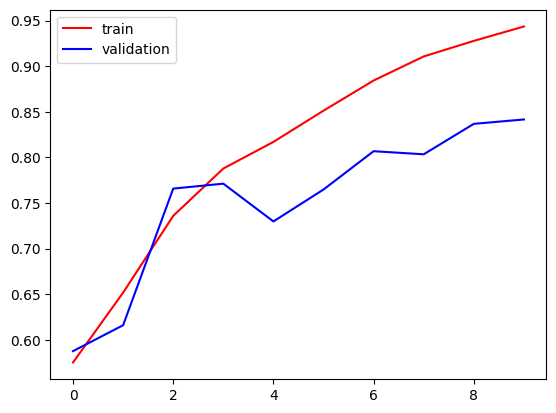

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

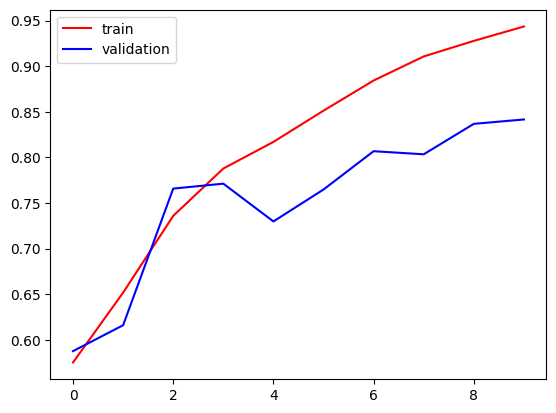

In [15]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

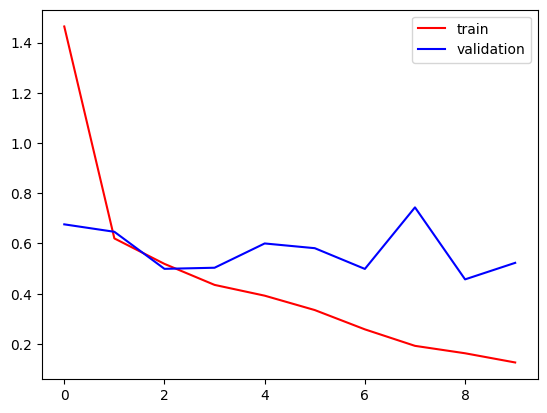

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

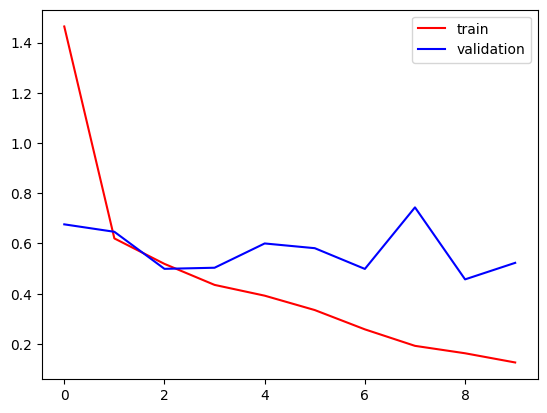

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

####ways to reduce overfitting
#### Add more data
#### Data Augmentation -> next video
#### L1/L2 Regularizer
#### Dropout
#### Batch Norm
#### Reduce complexity

In [72]:
import cv2

In [80]:
test_img = cv2.imread('/content/test/dogs/dog.12180.jpg')

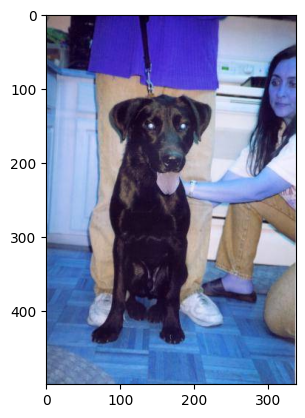

In [81]:
plt.imshow(test_img)

In [82]:
test_img.shape

(500, 338, 3)

In [83]:
test_img = cv2.resize(test_img,(256,256))

In [84]:
test_input = test_img.reshape((1,256,256,3))

In [85]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [86]:
test_img = cv2.imread('/content/test/cats/cat.10007.jpg')

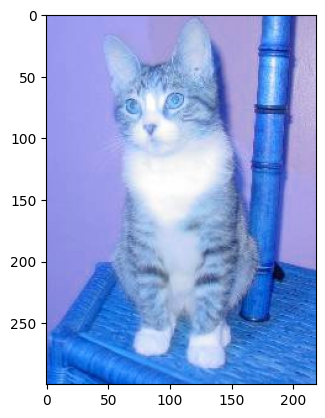

In [87]:
plt.imshow(test_img)

In [88]:
test_img.shape

(300, 219, 3)

In [89]:
test_img = cv2.resize(test_img,(256,256))

In [90]:
test_input = test_img.reshape((1,256,256,3))

In [91]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)